In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

print(genes)

['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7', 'gene8', 'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14', 'gene15', 'gene16', 'gene17', 'gene18', 'gene19', 'gene20', 'gene21', 'gene22', 'gene23', 'gene24', 'gene25', 'gene26', 'gene27', 'gene28', 'gene29', 'gene30', 'gene31', 'gene32', 'gene33', 'gene34', 'gene35', 'gene36', 'gene37', 'gene38', 'gene39', 'gene40', 'gene41', 'gene42', 'gene43', 'gene44', 'gene45', 'gene46', 'gene47', 'gene48', 'gene49', 'gene50', 'gene51', 'gene52', 'gene53', 'gene54', 'gene55', 'gene56', 'gene57', 'gene58', 'gene59', 'gene60', 'gene61', 'gene62', 'gene63', 'gene64', 'gene65', 'gene66', 'gene67', 'gene68', 'gene69', 'gene70', 'gene71', 'gene72', 'gene73', 'gene74', 'gene75', 'gene76', 'gene77', 'gene78', 'gene79', 'gene80', 'gene81', 'gene82', 'gene83', 'gene84', 'gene85', 'gene86', 'gene87', 'gene88', 'gene89', 'gene90', 'gene91', 'gene92', 'gene93', 'gene94', 'gene95', 'gene96', 'gene97', 'gene98', 'gene99', 'gene100']


In [4]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)
 

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  261  241  257  267  258  751  769  731  757  749
gene2  648  653  610  753  700  581  574  534  587  585
gene3  324  365  332  331  355  752  739  731  670  780
gene4  912  902  909  857  944  296  291  283  271  296
gene5  784  780  779  798  729  421  410  414  424  431
(100, 10)


In [5]:
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

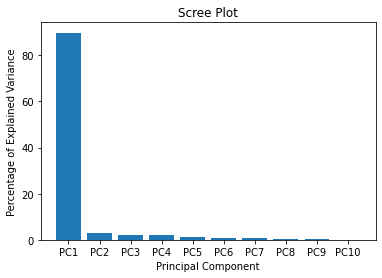

In [6]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

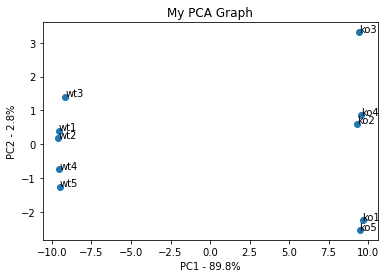

In [7]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [8]:
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene32   -0.105482
gene11    0.105469
gene85    0.105467
gene33   -0.105428
gene1     0.105407
gene38   -0.105394
gene31    0.105389
gene44   -0.105383
gene60    0.105373
gene61    0.105371
dtype: float64
